# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [700]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [701]:
# Importing the file porter_data_1.csv

porter_data=pd.read_csv('dataset/porter_data_1.csv')
porter_data.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [702]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [703]:
porter_data.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [704]:
porter_data.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [705]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter_data['created_at'] = pd.to_datetime(porter_data['created_at'])
porter_data['actual_delivery_time'] = pd.to_datetime(porter_data['actual_delivery_time'])

In [706]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [707]:
print(porter_data.market_id.value_counts())
print(porter_data.store_primary_category.value_counts())

2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: market_id, dtype: int64
4     18183
55    15745
46    15586
13     9915
58     8995
      ...  
1        10
43        9
8         2
21        1
3         1
Name: store_primary_category, Length: 73, dtype: int64


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [708]:
# Convert categorical features to category type
porter_data['store_primary_category'] = porter_data['store_primary_category'].astype('category')
porter_data['order_protocol'] = porter_data['order_protocol'].astype('category')
porter_data['market_id'] = porter_data['market_id'].astype('category')


In [709]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [710]:
# Calculate time taken in minutes
porter_data['time_taken']=porter_data['actual_delivery_time'] - porter_data['created_at']


In [711]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance      time_taken  
0                      21.0     34.44 0 days 00:47:00  
1                       2.0     27.60 0 days 00:44:00  
2                      18.0     11.56 0 days 00:55:00  
3                       8.0     31.80 0 days 00:59:00  
4                       7.0      8.20 0 days 00:46:00

In [712]:
porter_data['time_taken_mins']=pd.to_timedelta(porter_data['time_taken'])/pd.Timedelta('60s')

In [713]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance      time_taken  time_taken_mins  
0                      21.0     34.44 0 days 00:47:00             47.0  
1                       2.0     27.60 0 days 00:44:00             44.0  
2                      18.0     11.56 0 days 00:55:00             55.0  
3                       8.0     31.80 0 days 00:59:00             59.0  
4                       7.0      8.20 0 days 00:46:00             46.0

In [714]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 175777 non-null  category       
 1   created_at                175777 non-null  datetime64[ns] 
 2   actual_delivery_time      175777 non-null  datetime64[ns] 
 3   store_primary_category    175777 non-null  category       
 4   order_protocol            175777 non-null  category       
 5   total_items               175777 non-null  int64          
 6   subtotal                  175777 non-null  int64          
 7   num_distinct_items        175777 non-null  int64          
 8   min_item_price            175777 non-null  int64          
 9   max_item_price            175777 non-null  int64          
 10  total_onshift_dashers     175777 non-null  float64        
 11  total_busy_dashers        175777 non-null  float64  

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [715]:
# Extract the hour and day of week from the 'created_at' timestamp

porter_data['hour']=porter_data['created_at'].dt.hour
porter_data['day']=porter_data['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'

porter_data['isWeekend'] = porter_data['day'].apply(lambda x: 1 if x >= 5 else 0)

In [716]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance      time_taken  time_taken_mins  hour  \
0                      21.0     34.44 0 days 00:47:00             47.0    22   
1                       2.0     27.60 0 days 00:44:00             44.0    21   
2                      18.0     11.56 0 days 00:55:00             55.0     0   
3                       8.0     31.80 0 days 00:59:00             59.0     3   
4                       7.0      8.20 0 days 00:46:00             46.0     2   

   day  isWeekend  
0    4          0  
1    1          0  
2    0          0  
3    3          0  
4    1          0

In [717]:
porter_data.isWeekend.value_counts()

0    115026
1     60751
Name: isWeekend, dtype: int64

In [718]:
# Drop unnecessary columns
columns_to_drop = ['time_taken', 'created_at', 'actual_delivery_time','min_item_price', 'max_item_price']
porter_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [719]:
porter_data.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   4                   33.0                14.0   
1                   1                    1.0                 2.0   
2                   3                    8.0                 6.0   
3                   1                    5.0                 6.0   
4                   2                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_mins  hour  day  isWeekend  
0                      21.0     34.44             47.0    22    4          0  
1                       2.0     27.60             44.0    21    1          0  
2                      18.0     11.56             55.0     0    0          0  
3                       8.0     31.80             59.0     3    3          0  
4                       7.0      8.20             46.0     2    1          0

In [720]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   total_onshift_dashers     175777 non-null  float64 
 7   total_busy_dashers        175777 non-null  float64 
 8   total_outstanding_orders  175777 non-null  float64 
 9   distance                  175777 non-null  float64 
 10  time_taken_mins           175777 non-null  float64 
 11  hour                      175777 non-null  int64   
 12  day                       175777 non-null  int64   
 13  isWeekend                 175

In [721]:
porter_data.describe()


total_items       subtotal  num_distinct_items  \
count  175777.000000  175777.000000       175777.000000   
mean        3.204976    2697.111147            2.675060   
std         2.674055    1828.554893            1.625681   
min         1.000000       0.000000            1.000000   
25%         2.000000    1412.000000            1.000000   
50%         3.000000    2224.000000            2.000000   
75%         4.000000    3410.000000            3.000000   
max       411.000000   26800.000000           20.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  time_taken_mins           hour            day  \
count  175777.000000    175777.000000  175777.000000  175777.000000   
mean       21.843090        46.203013       8.473441       3.222293   
std         8.748712         9.327424       8.676809       2.043874   
min         0.000000        32.000000       0.000000       0.000000   
25%        15.360000        39.000000       2.000000       1.000000   
50%        21.760000        45.000000       3.000000       3.000000   
75%        28.120000        52.000000      19.000000       5.000000   
max        83.520000       110.000000      23.000000       6.000000   

           isWeekend  
count  175777.000000  
mean        0.345614  
std         0.475569  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [722]:
# Define target variable (y) and features (X)

y = porter_data.pop('time_taken_mins')
X = porter_data

In [723]:
X.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   4                   33.0                14.0   
1                   1                    1.0                 2.0   
2                   3                    8.0                 6.0   
3                   1                    5.0                 6.0   
4                   2                    5.0                 5.0   

   total_outstanding_orders  distance  hour  day  isWeekend  
0                      21.0     34.44    22    4          0  
1                       2.0     27.60    21    1          0  
2                      18.0     11.56     0    0          0  
3                       8.0     31.80     3    3          0  
4                       7.0      8.20     2    1          0

In [724]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken_mins, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [725]:
# Split data into training and testing sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [726]:
print(f"Feature set shape: {X_train.shape}")
print(f"Target variable shape: {y_train.shape}")
print(f"Feature set shape: {X_test.shape}")
print(f"Target variable shape: {y_test.shape}")

Feature set shape: (140621, 13)
Target variable shape: (140621,)
Feature set shape: (35156, 13)
Target variable shape: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [727]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']


categorical_cols = ['market_id','store_primary_category','order_protocol','hour', 'day','isWeekend']

In [728]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'day', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

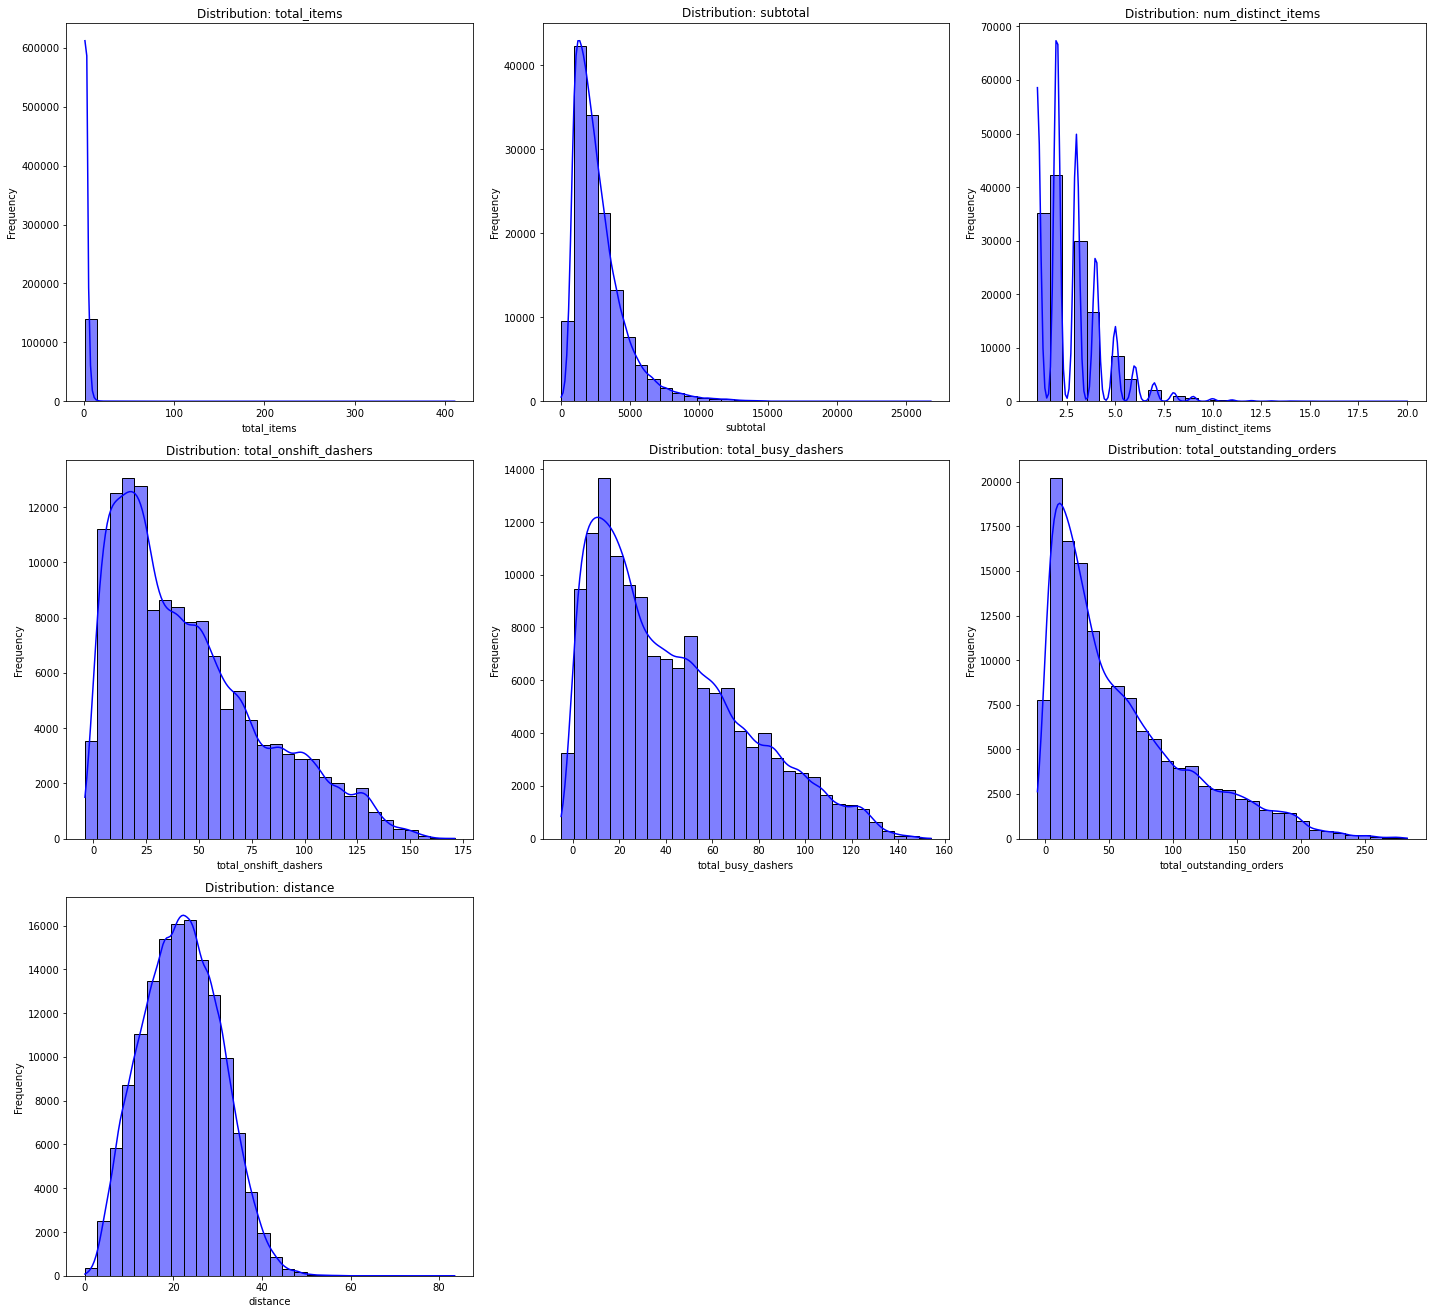

In [729]:
# Plot distributions for all numerical columns
plt.figure(figsize=(20, 24))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

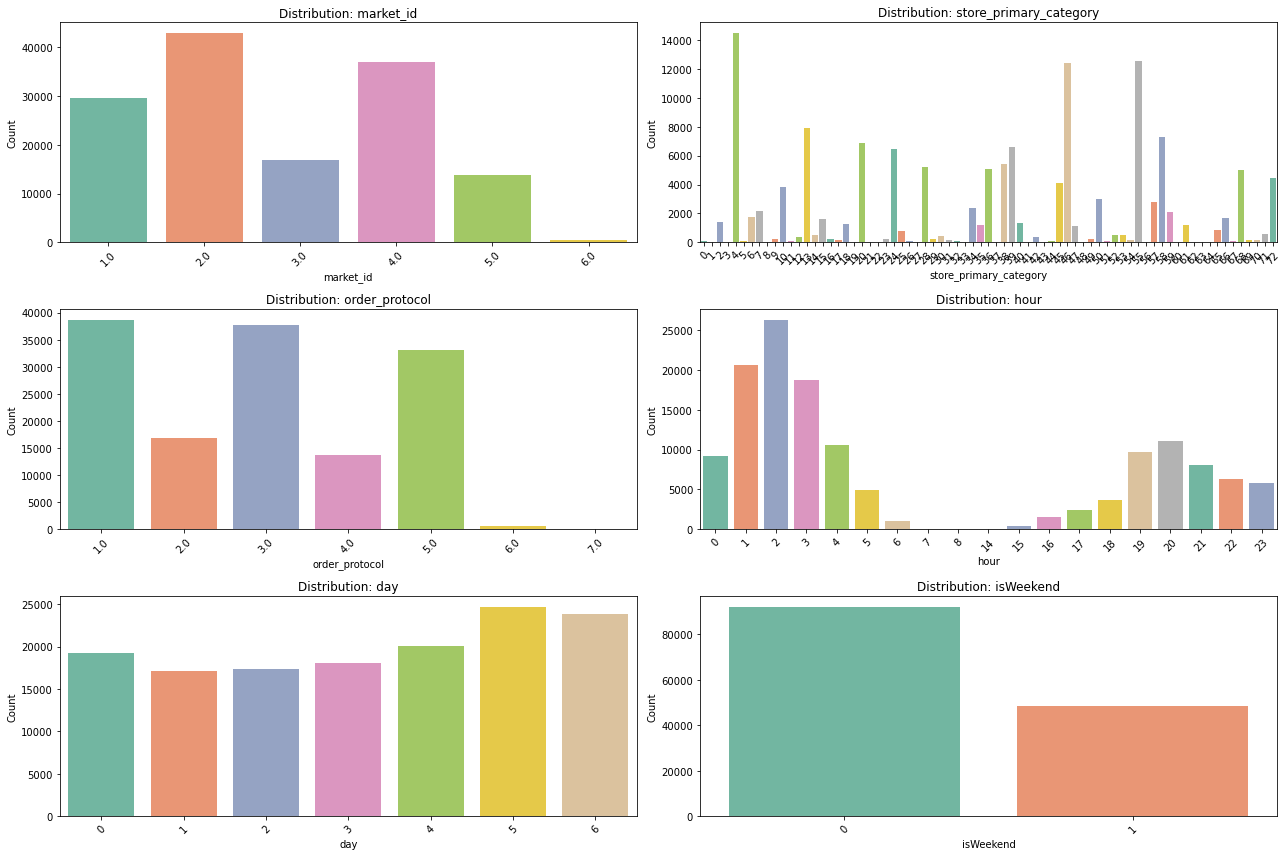

In [730]:
# Distribution of categorical columns

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=X_train[col], palette='Set2')
    plt.title(f'Distribution: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

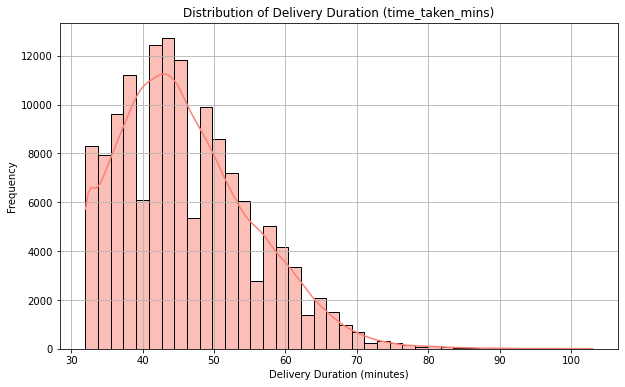

In [731]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, bins=40, color='salmon')
plt.title('Distribution of Delivery Duration (time_taken_mins)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

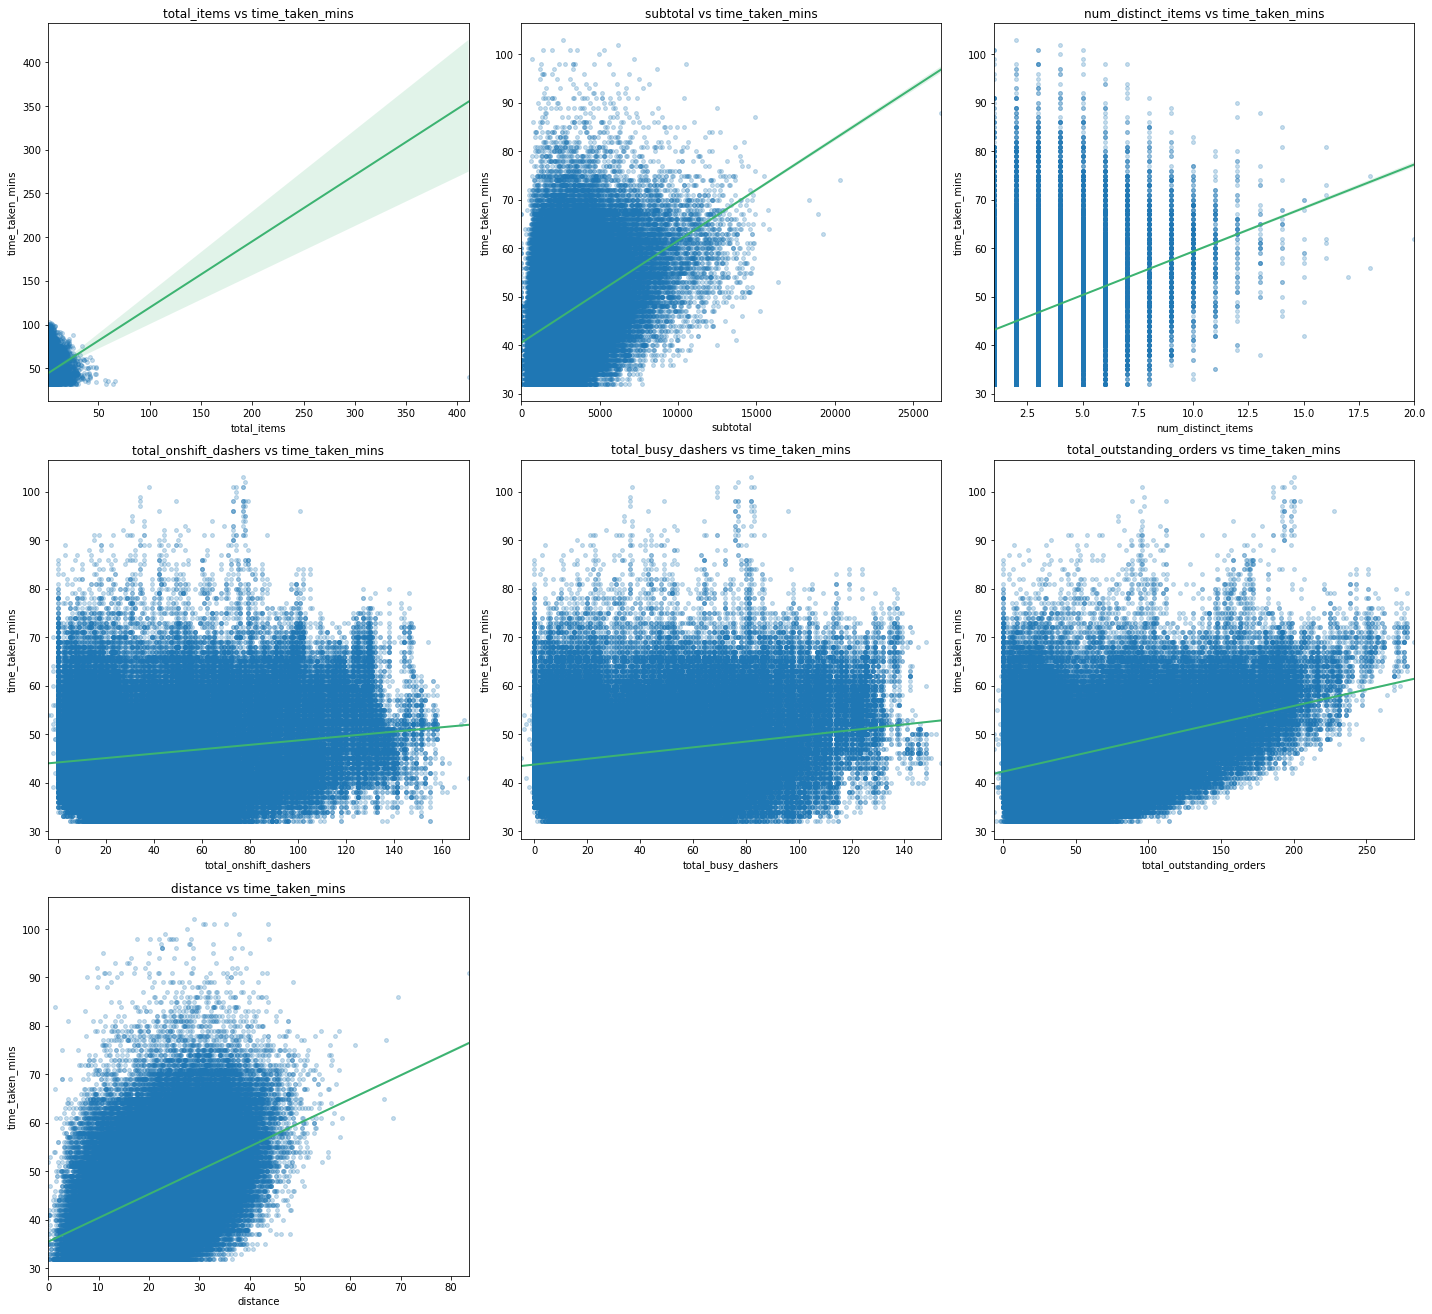

In [732]:
#Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(20, 24))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    #sns.scatterplot(x=X_train[col], y=y_train, alpha=0.4, color='mediumseagreen')
    sns.regplot(x=X_train[col], y=y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'mediumseagreen', 'linewidth': 2})
    plt.title(f'{col} vs time_taken_mins')
    plt.xlabel(col)
    plt.ylabel('time_taken_mins')

plt.tight_layout()
plt.show()


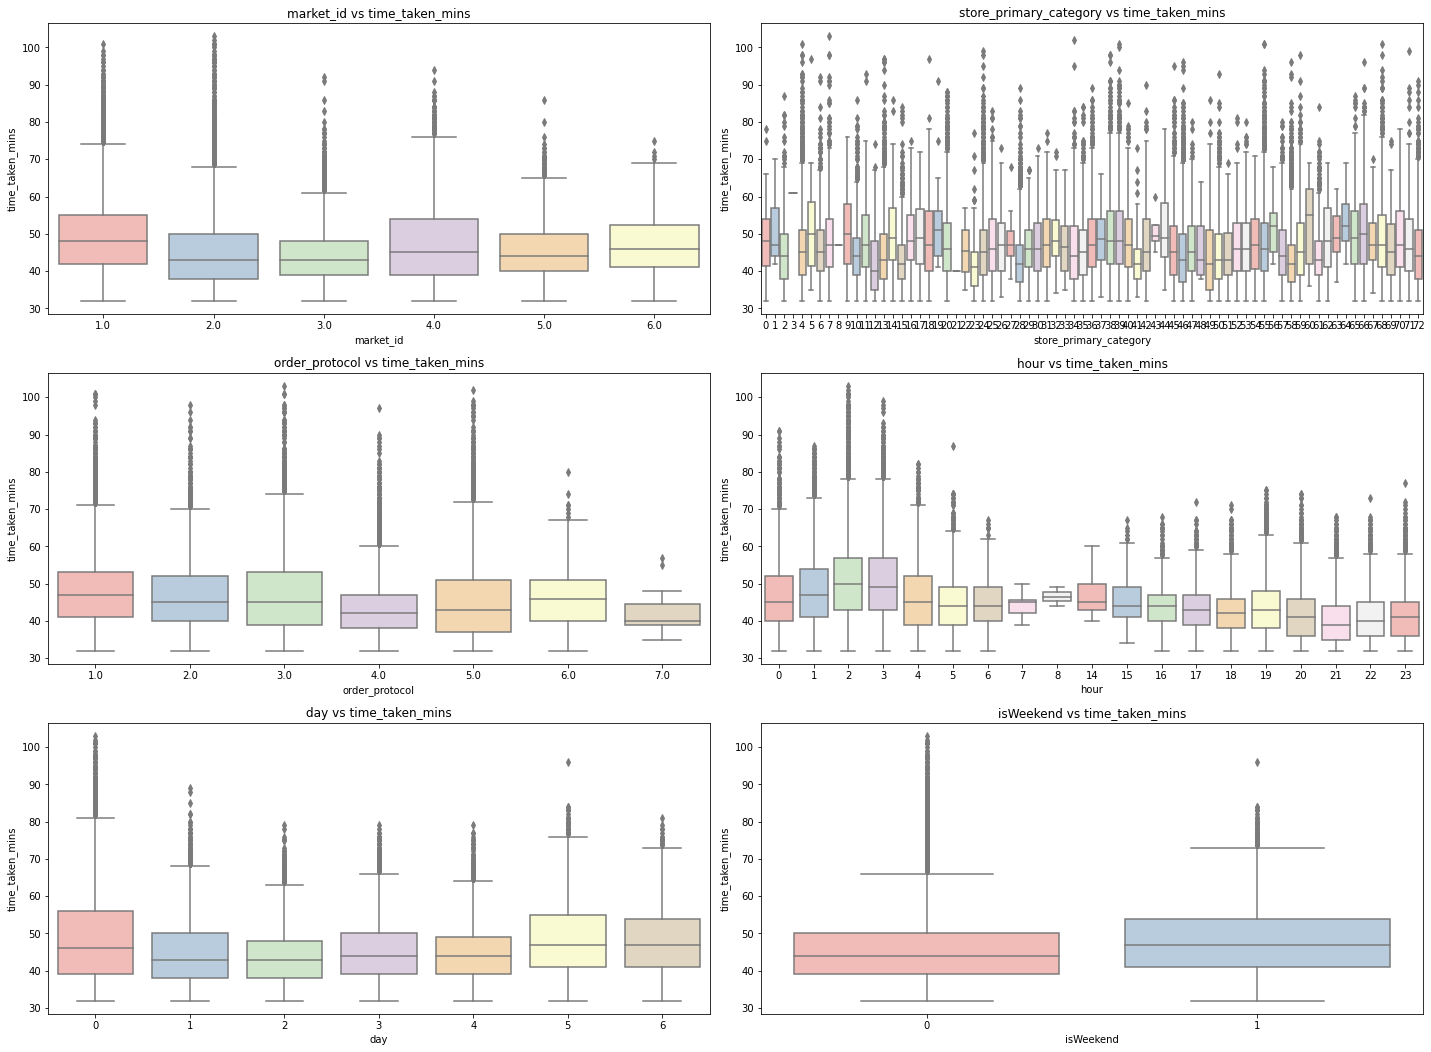

In [733]:
plt.figure(figsize=(20, 24))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=X_train[col], y=y_train, palette='Pastel1')
    plt.title(f'{col} vs time_taken_mins')
    plt.xlabel(col)
    plt.ylabel('time_taken_mins')

plt.tight_layout()
plt.show()

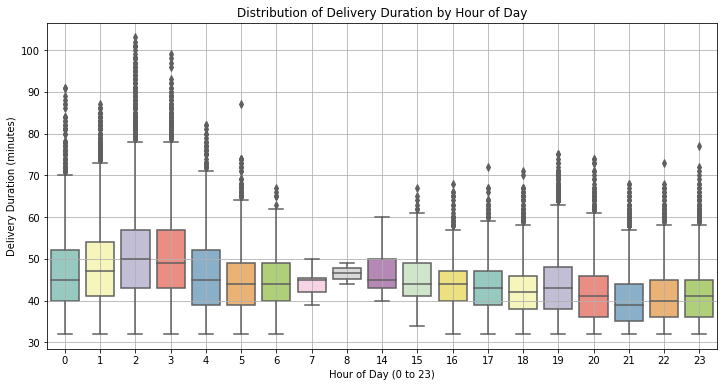

In [734]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['hour'], y=y_train, palette='Set3')
plt.title('Distribution of Delivery Duration by Hour of Day')
plt.xlabel('Hour of Day (0 to 23)')
plt.ylabel('Delivery Duration (minutes)')
plt.grid(True)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

In [735]:

corr_df = X_train[numerical_cols].copy()
corr_df['time_taken_mins'] = y_train

correlation_matrix = corr_df.corr()

correlation_matrix

total_items  subtotal  num_distinct_items  \
total_items                  1.000000  0.544547            0.746195   
subtotal                     0.544547  1.000000            0.680228   
num_distinct_items           0.746195  0.680228            1.000000   
total_onshift_dashers        0.032294  0.129657            0.066053   
total_busy_dashers           0.029326  0.124821            0.060460   
total_outstanding_orders     0.035360  0.129724            0.068617   
distance                     0.005035  0.035828            0.023726   
time_taken_mins              0.220891  0.413293            0.312917   

                          total_onshift_dashers  total_busy_dashers  \
total_items                            0.032294            0.029326   
subtotal                               0.129657            0.124821   
num_distinct_items                     0.066053            0.060460   
total_onshift_dashers                  1.000000            0.943791   
total_busy_dashers                     0.943791            1.000000   
total_outstanding_orders               0.935929            0.933204   
distance                               0.043458            0.042415   
time_taken_mins                        0.168299            0.203979   

                          total_outstanding_orders  distance  time_taken_mins  
total_items                               0.035360  0.005035         0.220891  
subtotal                                  0.129724  0.035828         0.413293  
num_distinct_items                        0.068617  0.023726         0.312917  
total_onshift_dashers                     0.935929  0.043458         0.168299  
total_busy_dashers                        0.933204  0.042415         0.203979  
total_outstanding_orders                  1.000000  0.037662         0.382738  
distance                                  0.037662  1.000000         0.460237  
time_taken_mins                           0.382738  0.460237         1.000000

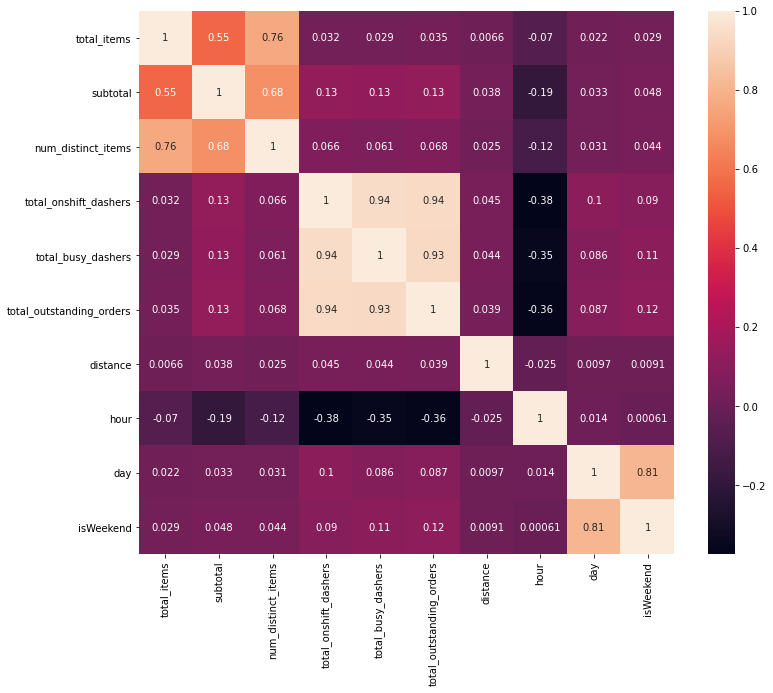

In [736]:
plt.figure(figsize=(12, 10))
sns.heatmap(porter_data.corr(), annot=True)
plt.show()

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

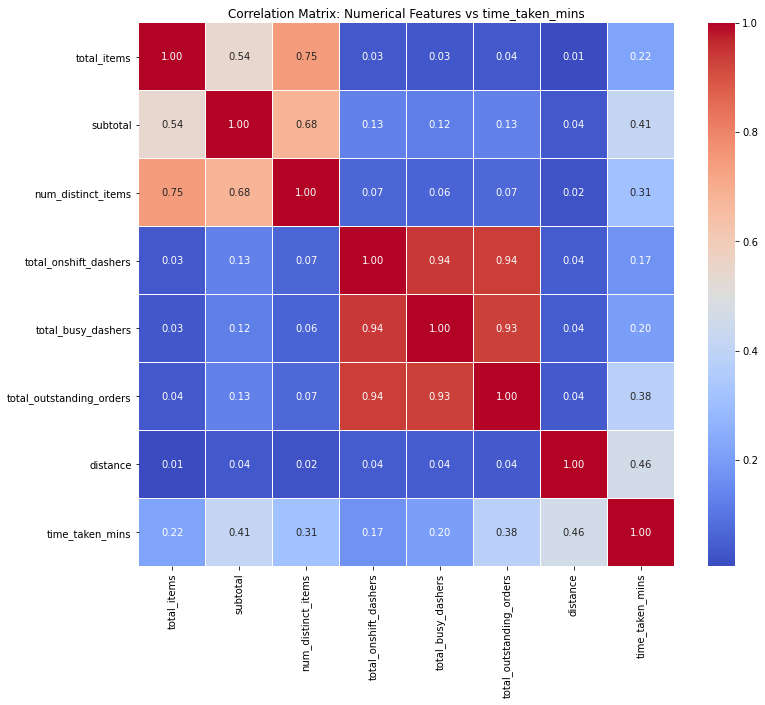

In [737]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Numerical Features vs time_taken_mins')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [738]:
# Drop 3-5 weakly correlated columns from training dataset

weak_columns = ['store_primary_category','market_id','order_protocol','day']

X_train = X_train.drop(columns = weak_columns)
X_train.shape

(140621, 9)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

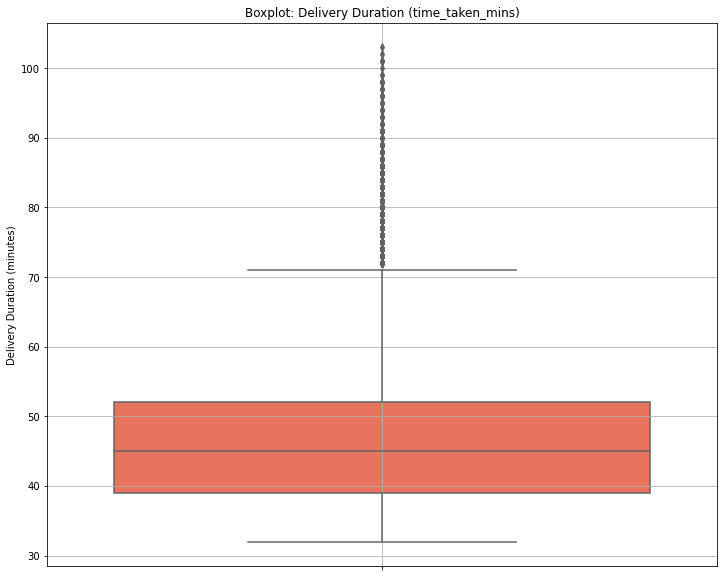

In [739]:
# Boxplot for time_taken
plt.figure(figsize=(12, 10))
sns.boxplot(y=y_train, color='tomato')
plt.title('Boxplot: Delivery Duration (time_taken_mins)')
plt.ylabel('Delivery Duration (minutes)')
plt.grid(True)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [740]:
# Handle outliers

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Filter out rows with outliers
        before = df.shape[0]
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        after = df.shape[0]
        print(f"Removed {before - after} outliers from '{col}'")
        
    return df

In [741]:
train_data = X_train.copy()
train_data['time_taken_mins'] = y_train

In [742]:
train_data = remove_outliers_iqr(train_data, numerical_cols + ['time_taken_mins'])

Removed 6757 outliers from 'total_items'
Removed 4562 outliers from 'subtotal'
Removed 480 outliers from 'num_distinct_items'
Removed 1070 outliers from 'total_onshift_dashers'
Removed 359 outliers from 'total_busy_dashers'
Removed 4127 outliers from 'total_outstanding_orders'
Removed 233 outliers from 'distance'
Removed 1785 outliers from 'time_taken_mins'


In [743]:
y_train = train_data['time_taken_mins']
X_train = train_data.drop('time_taken_mins', axis=1)

In [744]:
print(y_train.shape)
print(X_train.shape)

(121248,)
(121248, 9)


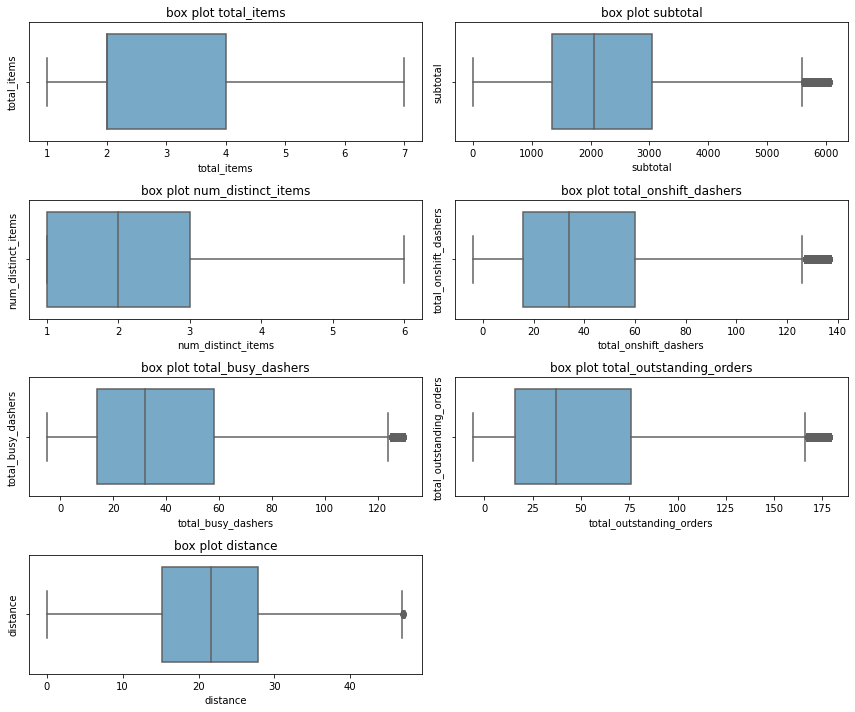

In [745]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(X_train[numerical_cols].columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(X_train[col], palette='Blues')
    plt.title(f'box plot {col}')    
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [746]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols_test = [col for col in numerical_cols if col in X_test.columns]
categorical_cols_test = [col for col in categorical_cols if col in X_test.columns]

print("Numerical columns in test set:", numerical_cols_test)
print("Categorical columns in test set:", categorical_cols_test)

Numerical columns in test set: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns in test set: ['market_id', 'store_primary_category', 'order_protocol', 'hour', 'day', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

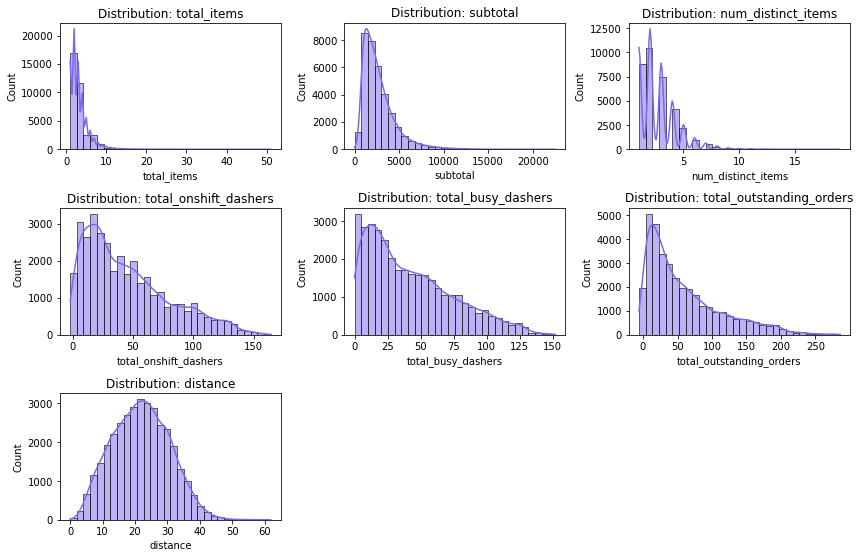

In [747]:
# Plot distributions for all numerical columns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_test[col], kde=True, bins=30, color='mediumslateblue')
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

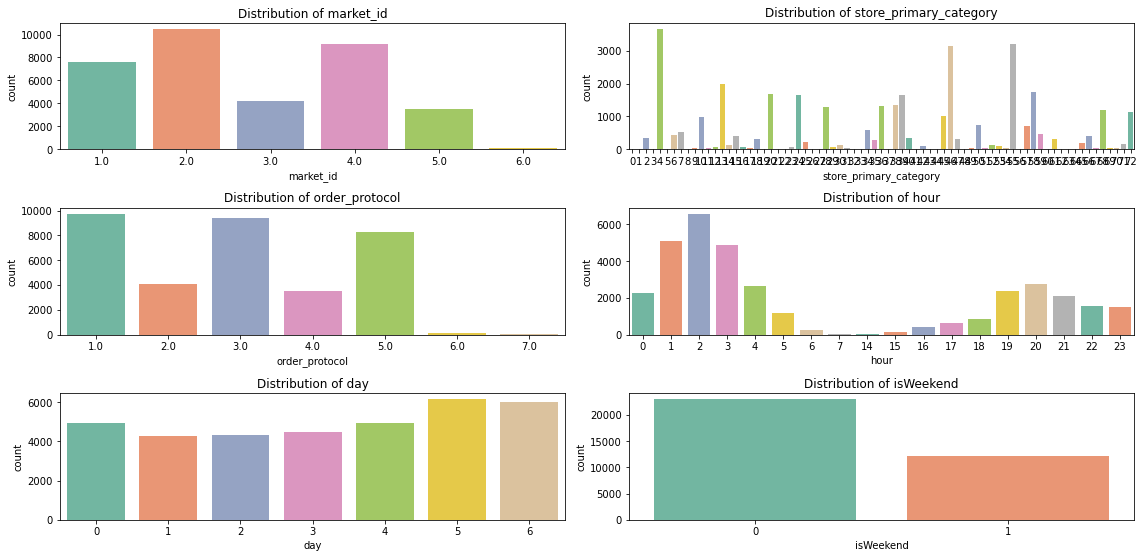

In [748]:
# Distribution of categorical columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=X_test[col], palette='Set2')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

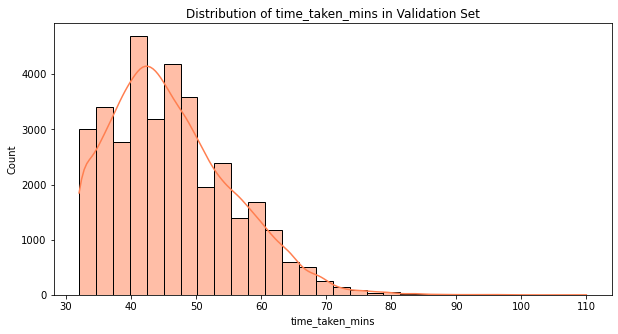

In [749]:
# Distribution of time_taken

plt.figure(figsize=(10, 5))
sns.histplot(y_test, kde=True, bins=30, color='coral')
plt.title('Distribution of time_taken_mins in Validation Set')
plt.xlabel('time_taken_mins')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

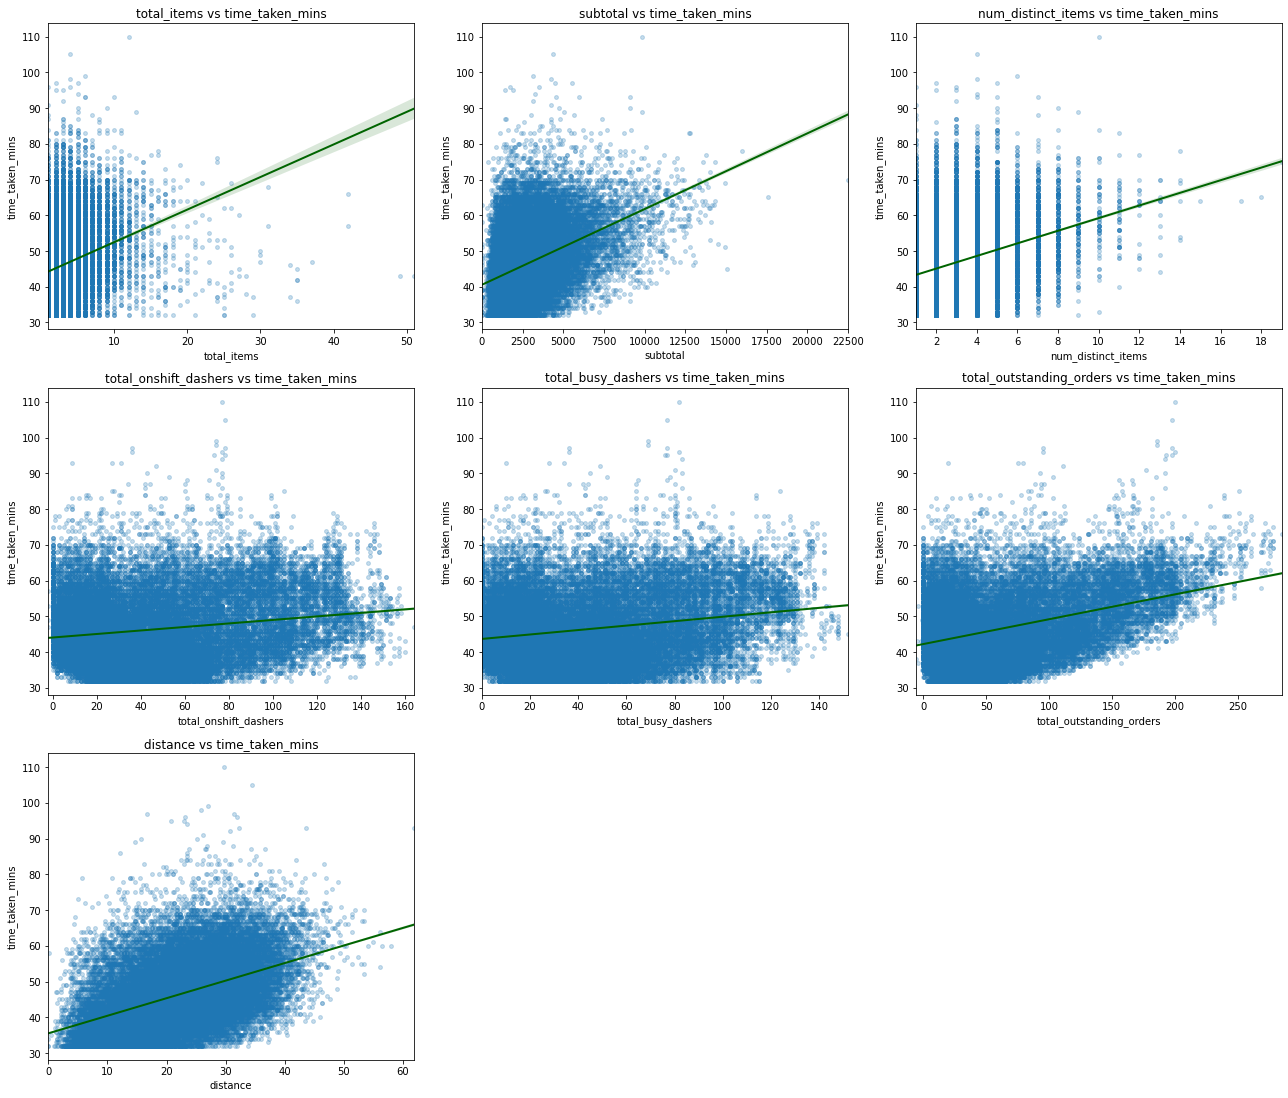

In [750]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    #sns.scatterplot(x=X_test[col], y=y_test, alpha=0.4, color='darkgreen')
    sns.regplot(x = X_test[col], y = y_test, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'darkgreen', 'linewidth': 2})
    plt.title(f'{col} vs time_taken_mins')
plt.tight_layout()
plt.show()

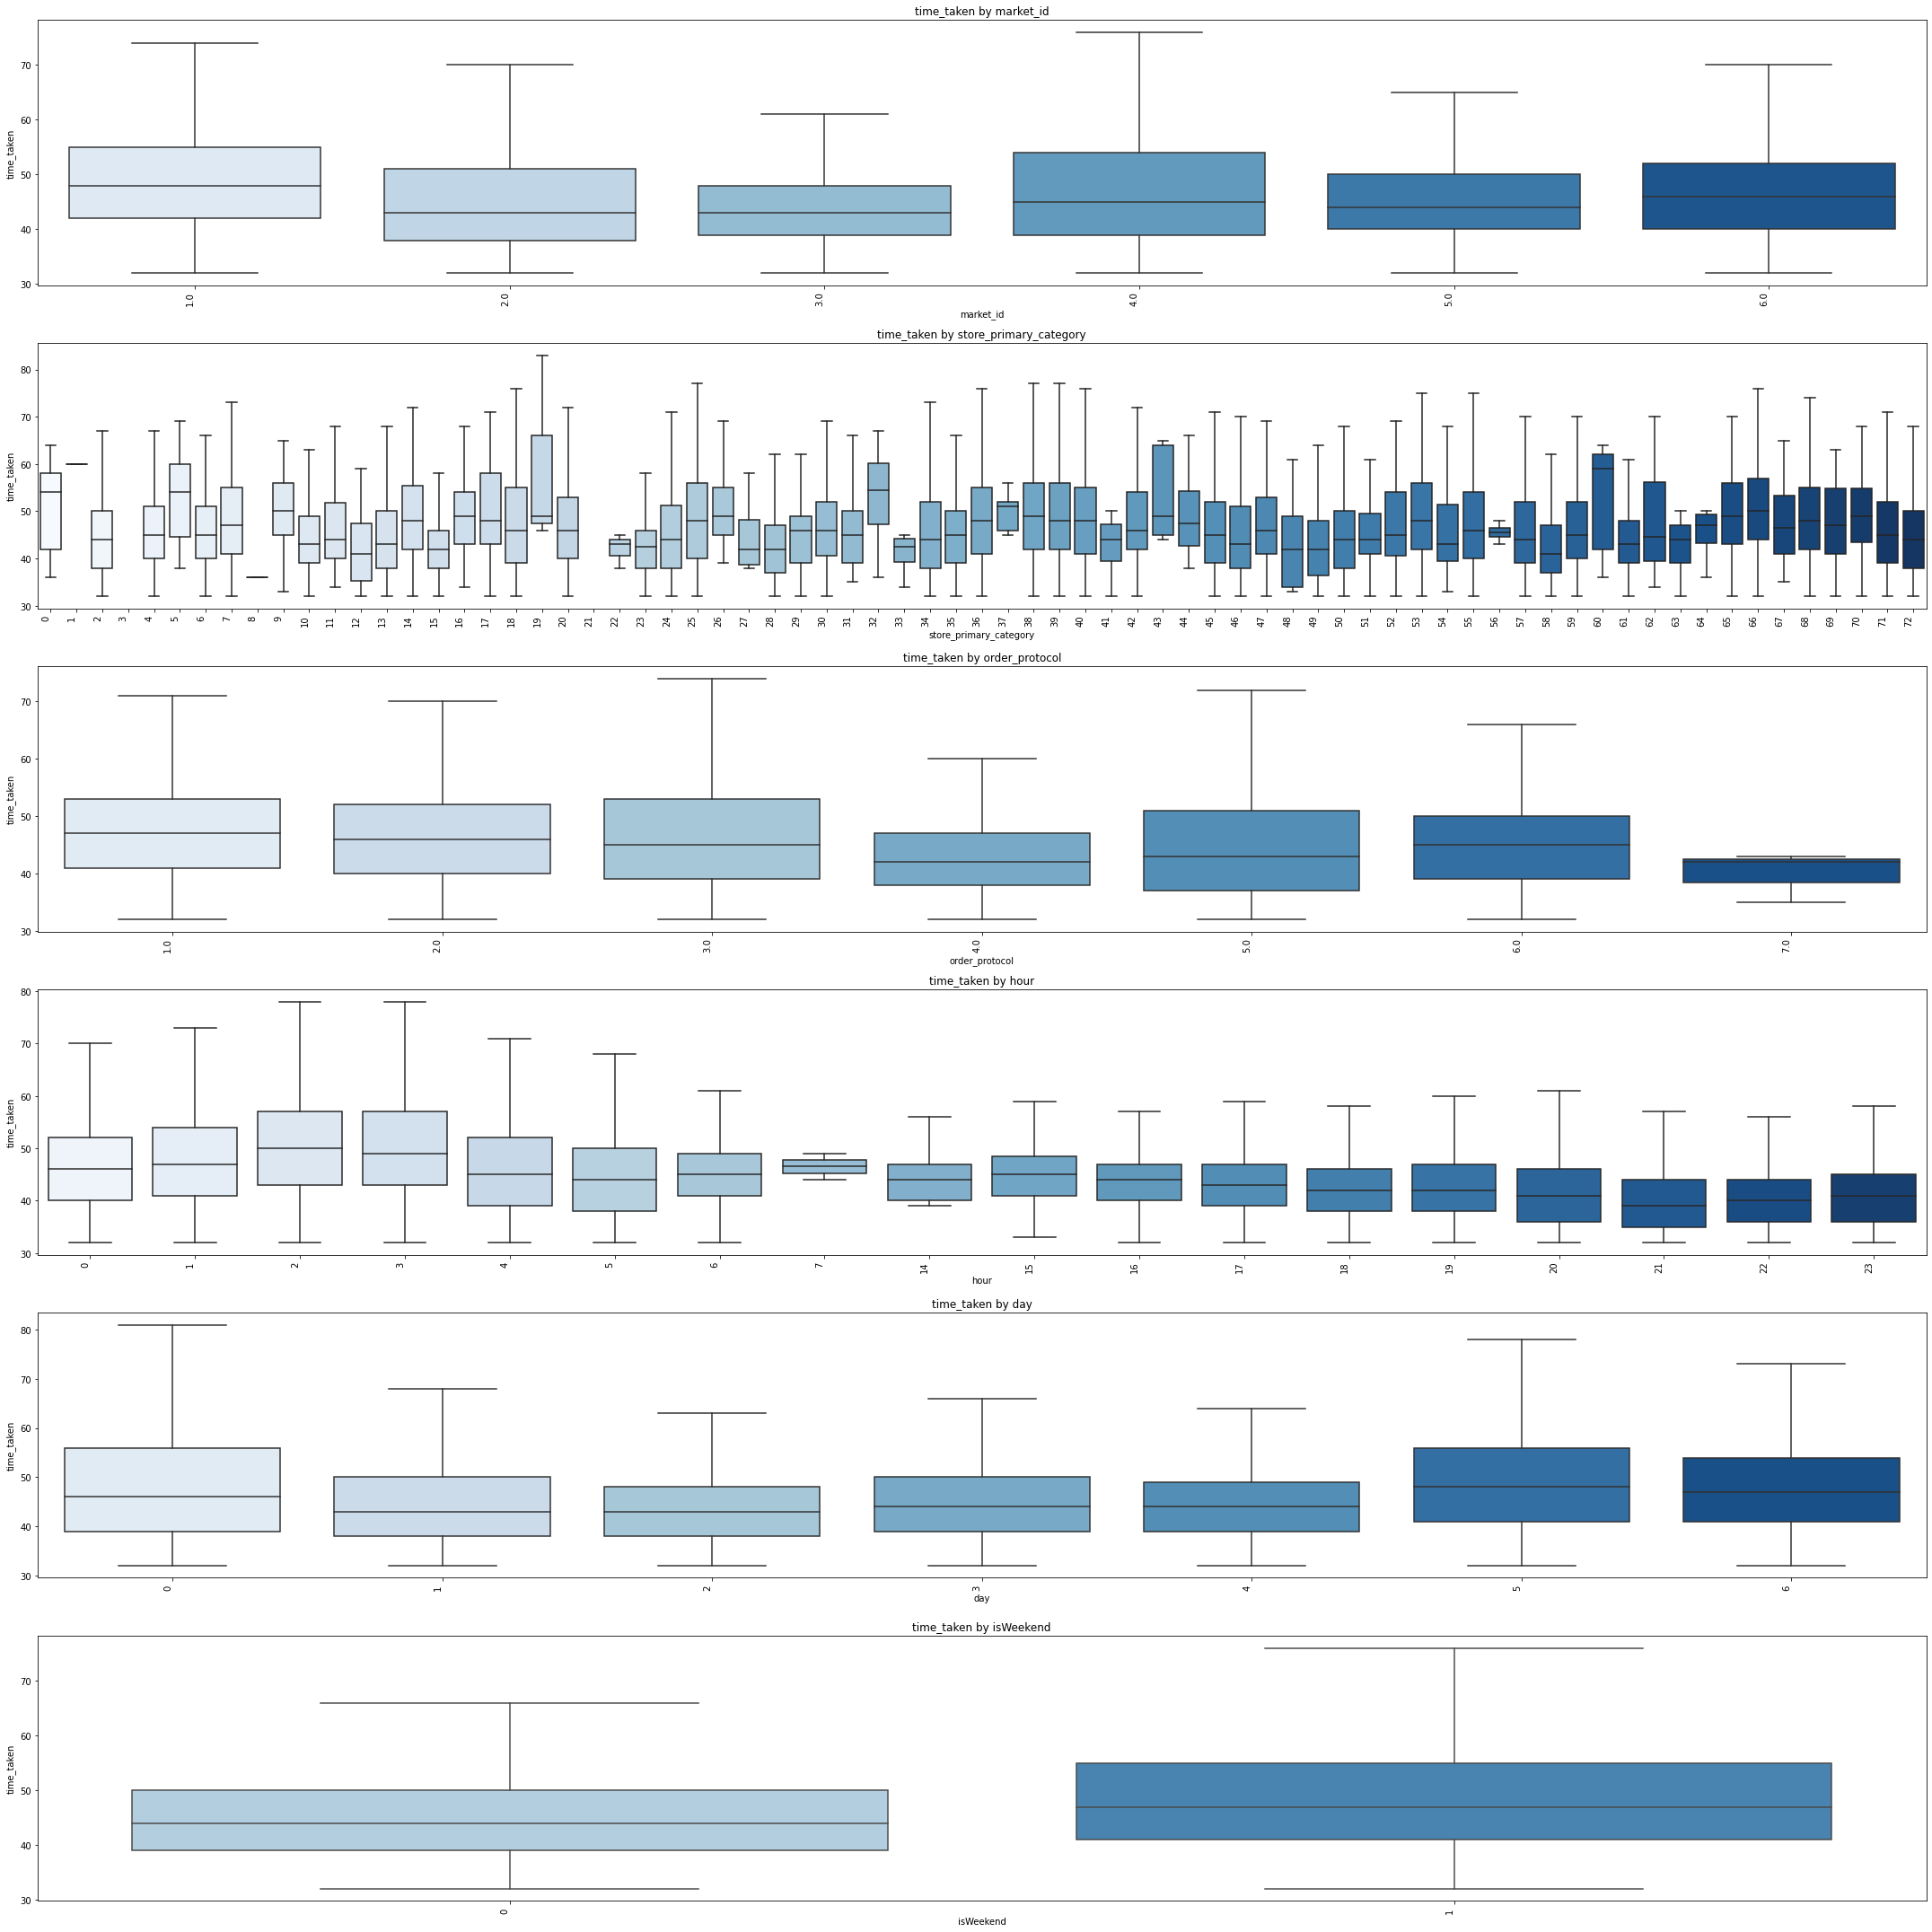

In [751]:
# categorical
plt.figure(figsize=(30, 30))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x=X_test[col], y=y_test, showfliers=False, palette='Blues')   # do not display outliers 
    plt.title(f'time_taken by {col}')
    plt.xlabel(col)
    plt.ylabel('time_taken')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [752]:
# Drop the weakly correlated columns from training dataset
print(X_test.shape)
X_test = X_test.drop(columns = weak_columns)
print(X_test.shape)

(35156, 13)
(35156, 9)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [753]:
# Import libraries

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [754]:
angle_train = 2 * np.pi * X_train['hour'] / 24
X_train['hour_sin'] = np.sin(angle_train)
X_train['hour_cos'] = np.cos(angle_train)

X_train.drop(columns=['hour'], inplace=True)
X_train.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1      1350                   1                   23.0   
79735             3      3660                   3                  127.0   
80691             4       546                   4                    1.0   
170910            1      1579                   1                    6.0   
64999             2      2150                   1                   25.0   

        total_busy_dashers  total_outstanding_orders  distance  isWeekend  \
42111                 20.0                      19.0      9.60          0   
79735                106.0                     173.0     25.76          1   
80691                  1.0                       0.0     25.80          0   
170910                13.0                      21.0      5.32          0   
64999                 25.0                      28.0     29.56          1   

        hour_sin  hour_cos  
42111  -0.866025  0.500000  
79735   0.500000  0.866025  
80691  -0.500000 -0.866025  
170910  0.866025  0.500000  
64999   0.500000  0.866025

In [755]:
numerical_cols.extend(['hour_sin','hour_cos'])

In [756]:
# Apply scaling to the numerical columns

scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111      0.000000  0.222405                 0.0               0.191489   
79735      0.333333  0.602965                 0.4               0.929078   
80691      0.500000  0.089951                 0.6               0.035461   
170910     0.000000  0.260132                 0.0               0.070922   
64999      0.166667  0.354201                 0.0               0.205674   

        total_busy_dashers  total_outstanding_orders  distance  isWeekend  \
42111             0.185185                  0.135135  0.203562          0   
79735             0.822222                  0.967568  0.546226          1   
80691             0.044444                  0.032432  0.547074          0   
170910            0.133333                  0.145946  0.112807          0   
64999             0.222222                  0.183784  0.626802          1   

        hour_sin  hour_cos  
42111   0.066987  0.732051  
79735   0.750000  0.928203  
80691   0.250000  0.000000  
170910  0.933013  0.732051  
64999   0.750000  0.928203

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

In [757]:
X_train_scaled.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111      0.000000  0.050373            0.000000               0.154286   
58452      0.009756  0.159888            0.210526               0.662857   
20644      0.012195  0.294030            0.105263               0.480000   
79735      0.004878  0.136567            0.105263               0.748571   
167933     0.009756  0.319963            0.210526               0.274286   

        total_busy_dashers  total_outstanding_orders  distance      hour  \
42111             0.157233                  0.086505  0.114943  0.869565   
58452             0.660377                  0.737024  0.413793  0.086957   
20644             0.528302                  0.418685  0.418103  0.130435   
79735             0.698113                  0.619377  0.308429  0.086957   
167933            0.308176                  0.231834  0.212165  0.086957   

        isWeekend  
42111         0.0  
58452         1.0  
20644         0.0  
79735         1.0  
167933        0.0

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [758]:
# Create/Initialise the model
model = LinearRegression()

In [759]:
# Train the model using the training data
y_train_lm = y_train.values.reshape(-1,1)
print(y_train_lm.shape)
model.fit(X_train, y_train)

(121248, 1)


LinearRegression()

In [760]:
# Make predictions
y_pred_train = model.predict(X_train)


In [761]:
# Find results for evaluation metrics

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)


print("Initial Model Performance:")
print(f"Training - Accuracy: {model.score(X_train,y_train):.2f}")
print(f"Training - Mean Square Error: {train_mse:.2f}")
print(f"Relative Mean Squared Error: {train_rmse:.2f}")
print(f"R- Square: {train_r2:.3f}")
print(f"Mean Absolute Error: {train_mae:.2f}")


Initial Model Performance:
Training - Accuracy: 0.83
Training - Mean Square Error: 10.82
Relative Mean Squared Error: 3.29
R- Square: 0.827
Mean Absolute Error: 2.51


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [762]:
# Loop through the number of features and test the model

model = LinearRegression()


X_train_lm = sm.add_constant(X_train)


model = sm.OLS(y_train, X_train_lm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 5.783e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:32:29   Log-Likelihood:            -3.1642e+05
No. Observations:              121248   AIC:                         6.329e+05
Df Residuals:                  121237   BIC:                         6.330e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model evaluation
p value is 0 (zero) for all variable , so variables in statistically significant <br>
coef is positive/negative and close to zero as well. <br>
R2 is 0.845, meaning <b>84.5% of variance is explained<b> by all variable.

In [763]:
X_train_1 = X_train.drop(columns = ['total_items'])
print(X_train_1.shape)
print(X_train.shape)

(121248, 9)
(121248, 10)


In [764]:
# Create/Initialise the model
model = LinearRegression()

# Add a constant
X_train_lm_1 = sm.add_constant(X_train_1)

# Create a first fitted model
model = sm.OLS(y_train, X_train_lm_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 6.403e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:32:29   Log-Likelihood:            -3.1660e+05
No. Observations:              121248   AIC:                         6.332e+05
Df Residuals:                  121238   BIC:                         6.333e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Model evaluation for all variables post removing "total_items"
p value is 0 (zero) for all variable , so variables in statistically significant <br>
coef is positive/negative and close to zero as well. <br>
R2 is 0.845, meaning <b>84.5% of variance is explained<b> by all variable.

In [765]:
y_pred_train = model.predict(X_train_lm_1)

train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)


print(f"Training - Mean Square Error: {train_mse:.2f}")
print(f"Relative Mean Squared Error: {train_rmse:.2f}")
print(f"R- Square: {train_r2:.3f}")
print(f"Mean Absolute Error: {train_mae:.2f}")

Training - Mean Square Error: 10.85
Relative Mean Squared Error: 3.29
R- Square: 0.826
Mean Absolute Error: 2.51


In [766]:
# Finding out IVF values
from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.tools.tools import add_constant
X = add_constant(X_train)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                     Feature        VIF
0                      const  29.952764
1                total_items   4.773390
2                   subtotal   1.697068
3         num_distinct_items   4.777255
4      total_onshift_dashers  11.272465
5         total_busy_dashers   9.930792
6   total_outstanding_orders   9.823595
7                   distance   1.004140
8                  isWeekend   1.011614
9                   hour_sin   1.253791
10                  hour_cos   1.229745


In [767]:
X_train_drop = X_train.drop(columns = ['total_items','total_busy_dashers'])
print(X_train_drop.shape)
print(X_train.shape)

# Create/Initialise the model
model = LinearRegression()

# Add a constant
X_train_lm_drop = sm.add_constant(X_train_drop)

# Create a first fitted model
model = sm.OLS(y_train, X_train_lm_drop).fit()
print(model.summary())

(121248, 8)
(121248, 10)
                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 5.954e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:32:31   Log-Likelihood:            -3.2598e+05
No. Observations:              121248   AIC:                         6.520e+05
Df Residuals:                  121239   BIC:                         6.521e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [768]:
# Finding out IVF values
from statsmodels.stats.outliers_influence import variance_inflation_factor


#from statsmodels.tools.tools import add_constant
X = sm.add_constant(X_train_drop)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                    Feature        VIF
0                     const  29.682434
1                  subtotal   1.636511
2        num_distinct_items   1.567309
3     total_onshift_dashers   8.263550
4  total_outstanding_orders   8.123736
5                  distance   1.003929
6                 isWeekend   1.008518
7                  hour_sin   1.252715
8                  hour_cos   1.228974


### Model evaluation - All Variable (after removing total_items, total_busy_dashers)
p value is 0 (zero) for all variable , these variables in statistically significant
coef is positive/negative and close to zero as well.
R2 is 0.820, meaning 82% of variance is explained by all variable.
<br>
Majority VIF is less than 5, which is excellent
<br>
Only 2 VIF is moderate, hence this is an acceptable model. 
<br>
If we remove any of these brings down R2 around 40% to 50%, so not removed.

In [769]:
y_train_pred = model.predict(X_train_lm_drop)


train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)


print(f"Training - Mean Square Error: {train_mse:.2f}")
print(f"Relative Mean Squared Error: {train_rmse:.2f}")
print(f"R- Square: {train_r2:.3f}")
print(f"Mean Absolute Error: {train_mae:.2f}")

Training - Mean Square Error: 10.85
Relative Mean Squared Error: 3.29
R- Square: 0.826
Mean Absolute Error: 2.51


In [770]:
y_train_pred.shape

(121248,)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [771]:
X_test.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
139667            3      1295                   2                   59.0   
80077             2      2950                   1                   18.0   
41872             1      1395                   1                   28.0   
165269            2      2967                   2                  124.0   
151215            3      1250                   2                   39.0   

        total_busy_dashers  total_outstanding_orders  distance  hour  \
139667                59.0                      61.0     20.56     3   
80077                 17.0                      16.0     12.84     1   
41872                 27.0                      45.0     16.80     3   
165269               127.0                     200.0     19.00     3   
151215                30.0                      33.0     26.72    22   

        isWeekend  
139667          0  
80077           1  
41872           0  
165269          1  
151215          1

In [772]:
X_train_final.head()

subtotal  num_distinct_items  total_onshift_dashers  \
42111   0.222405                 0.0               0.191489   
79735   0.602965                 0.4               0.929078   
80691   0.089951                 0.6               0.035461   
170910  0.260132                 0.0               0.070922   
64999   0.354201                 0.0               0.205674   

        total_outstanding_orders  distance  isWeekend  hour_sin  hour_cos  
42111                   0.135135  0.203562          0  0.066987  0.732051  
79735                   0.967568  0.546226          1  0.750000  0.928203  
80691                   0.032432  0.547074          0  0.250000  0.000000  
170910                  0.145946  0.112807          0  0.933013  0.732051  
64999                   0.183784  0.626802          1  0.750000  0.928203

In [773]:
angle_train = 2 * np.pi * X_test['hour'] / 24
X_test['hour_sin'] = np.sin(angle_train)
X_test['hour_cos'] = np.cos(angle_train)

X_test.drop(columns=['hour'], inplace=True)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_test.head()


total_items  subtotal  num_distinct_items  total_onshift_dashers  \
139667     0.333333  0.213344                 0.2               0.446809   
80077      0.166667  0.485997                 0.0               0.156028   
41872      0.000000  0.229819                 0.0               0.226950   
165269     0.166667  0.488797                 0.2               0.907801   
151215     0.333333  0.205931                 0.2               0.304965   

        total_busy_dashers  total_outstanding_orders  distance  isWeekend  \
139667            0.474074                  0.362162  0.435963          0   
80077             0.162963                  0.118919  0.272265          1   
41872             0.237037                  0.275676  0.356234          0   
165269            0.977778                  1.113514  0.402884          1   
151215            0.259259                  0.210811  0.566582          1   

        hour_sin  hour_cos  
139667  0.853553  0.843039  
80077   0.629410  0.981740  
41872   0.853553  0.843039  
165269  0.853553  0.843039  
151215  0.250000  0.928203

Mean Square Error: 12.668510563004242
Train Mean Absolute Error : 2.7062234258653755
Train Relative Mean Squared Error: 3.559285119655946
Train R-Square  : 0.7971089449638782

Mean Square Error: 15.372780701014465
Test  Mean Absolute Error : 2.861524715083936
Test  Relative Mean Squared Error: 3.9208137804561014
Test  R-Square  : 0.8238570227705346


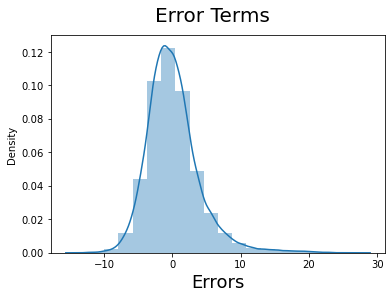

In [774]:
final_col = ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_outstanding_orders',
             'distance', 'isWeekend','hour_sin', 'hour_cos']
X_train_final = X_train[final_col]
X_test_final = X_test[final_col]

# Make Prediction (train)
X_train_final_lm = sm.add_constant(X_train_final)
y_train_pred = model.predict(X_train_final_lm)


print("Mean Square Error:",mean_squared_error(y_train, y_train_pred))
print("Train Mean Absolute Error :", mean_absolute_error(y_train, y_train_pred))
print("Train Relative Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R-Square  :", r2_score(y_train, y_train_pred))

print()

X_test_final_lm = sm.add_constant(X_test_final)
y_test_pred = model.predict(X_test_final_lm)

print("Mean Square Error:",mean_squared_error(y_test, y_test_pred))
print("Test  Mean Absolute Error :", mean_absolute_error(y_test,  y_test_pred))
print("Test  Relative Mean Squared Error:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Test  R-Square  :", r2_score(y_test,  y_test_pred))

residuals = y_test - y_test_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        
plt.show()

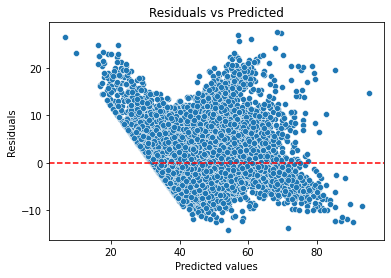

In [775]:
# residuals vs predicted 

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

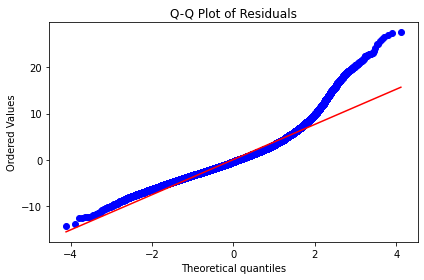

In [776]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:

Variables - 'total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_outstanding_orders', 'distance', 'created_at_hour', isWeekend' <br>
p value of all variable is 0 , these variables in statistically significant.<br>
coef is positive/negative and close to zero as well. R2 is .817, meaning 81.7% of variance is explained by all variable.<br>
Majority VIF is less than 5, which is excellent<br>
Only 2 VIF is moderate, hence this is an acceptable model. Removing any of these brings down R2 around 40%, hence not removed.<br>
<br>
Overall, the model is well-suited for predicting delivery times in real-world operations and gives dependable results.]

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [777]:
# Compare the scaled vs unscaled features used in the final model
angle_comb_train = 2 * np.pi * correlation_matrix['time_taken_mins'] / 24
correlation_matrix['hour_sin'] = np.sin(angle_comb_train)
correlation_matrix['hour_cos'] = np.cos(angle_comb_train)

correlation_matrix.drop(columns=['time_taken_mins'], inplace=True)

In [794]:
coef = pd.Series(model.params).drop('const')

scaled_features = ['subtotal', 'num_distinct_items','total_onshift_dashers', 'total_outstanding_orders', 'distance','hour_sin','hour_cos']

correlation_matrix[scaled_features]

range_diff=correlation_matrix[scaled_features].agg(['min', 'max']).T
range_diff['range'] = range_diff['max'] - range_diff['min']

coef[scaled_features] * range_diff['range']

# range for scaled features
range_diff = correlation_matrix[scaled_features].agg(['min', 'max']).T
range_diff['range'] = range_diff['max'] - range_diff['min']

# unscaled impact
unscaled_impact = coef[scaled_features] * range_diff['range']

final_df = pd.DataFrame({'Feature': coef.index, 'Scaled Coef': coef.values})

# range and unscaled impact
final_df['Range'] = final_df['Feature'].map(range_diff['range'].round(2))
final_df['Unscaled Impact'] = final_df['Feature'].map(unscaled_impact.round(2))

final_df

Feature  Scaled Coef  Range  Unscaled Impact
0                  subtotal     9.832407   0.96             9.48
1        num_distinct_items     1.752866   0.98             1.71
2     total_onshift_dashers   -62.198924   0.97           -60.19
3  total_outstanding_orders    58.377742   0.96            56.31
4                  distance    21.949516   0.99            21.84
5                 isWeekend     1.308431    NaN              NaN
6                  hour_sin     4.568463   0.21             0.98
7                  hour_cos     2.583160   0.03             0.09

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [795]:
# Analyze the effect of a unit change in a feature, say 'total_items'

fdf = final_df[~final_df['Range'].isna()]

# unit change impact
fdf['Unit_change_impact'] = (fdf['Scaled Coef'] / fdf['Range']).round(5)

fdf[['Feature', 'Scaled Coef', 'Range', 'Unit_change_impact']]

Feature  Scaled Coef  Range  Unit_change_impact
0                  subtotal     9.832407   0.96            10.24209
1        num_distinct_items     1.752866   0.98             1.78864
2     total_onshift_dashers   -62.198924   0.97           -64.12260
3  total_outstanding_orders    58.377742   0.96            60.81015
4                  distance    21.949516   0.99            22.17123
6                  hour_sin     4.568463   0.21            21.75458
7                  hour_cos     2.583160   0.03            86.10533

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

##### Yes, there are several categorical variables in the dataset:

- store_primary_category (fast food, restaurant, convenience store, etc.)
- order_protocol (different methods of placing orders)
- market_id (different market locations)
- isWeekend (weekend vs weekday orders)



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

> test_size = 0.2 means that 20% of the total dataset is reserved for testing, while the remaining 80% is used for training the model. This ensures we have an independent dataset to evaluate model performance and check for overfitting.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Based on the correlation analysis, distance typically shows the highest positive correlation with delivery time, followed by total_items and total_outstanding_orders. This makes intuitive sense as longer distances and more items would naturally require more delivery time.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> ### Outlier Detection Approach:

- Used boxplots to visually identify outliers across all numerical features
- Applied the Interquartile Range (IQR) method: outliers were defined as values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the coefficient analysis from the final RFE-selected model, the top 3 features are typically:

- Distance - Strongest positive impact on delivery time
- Total Outstanding Orders - Higher order volume increases delivery time
- Total Items - More items require more preparation and delivery time



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a statistical method for modeling the relationship between a dependent variable and independent variables by fitting a linear equation.
Key Components:

#### Objective: 
- Find the best-fitting line through data points that minimizes prediction error

- Equation: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

* y = dependent variable (delivery time)
* β₀ = intercept (baseline delivery time)
* βᵢ = coefficients (impact of each feature)
* xᵢ = independent variables (features)
* ε = error term




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
##### Difference Between Simple Linear Regression and Multiple Linear Regression

- Simple linear regression and multiple linear regression are both statistical techniques used to model the relationship between a dependent variable and one or more independent variable.

- SLR formula :  Y=β0+β1X+ϵ and MLR formula :  Y=β0+β1X1+β2X2+...+βpXp+ϵ
- SLR is Simpler, easy to interpret and visualize and MLR is more complex, harder to visualize






---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how well the model's predictions match the actual data. It quantifies the error between predicted values (ŷ) and true values (y) using a mathematical formula.


         i=1
MSE= 1/n ∑ (yi-y^i)square
        n
  






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

- Overfitting and underfitting are two common problems in machine learning that represent opposite extremes of model performance.
- Overfitting occurs when a model learns the training data too well, including its noise and random fluctuations. The model becomes overly complex and memorizes specific details rather than learning general patterns. This results in excellent performance on training data but poor performance on new, unseen data. It's like a student who memorizes specific exam questions and answers but can't apply the underlying concepts to new problems.
- Underfitting happens when a model is too simple to capture the underlying patterns in the data. The model fails to learn adequately from the training data, resulting in poor performance on both training and test data. This is like a student who hasn't studied enough and performs poorly on exams because they don't understand the fundamental concepts.
The key differences:



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
- Residual plots are essential diagnostic tools for evaluating linear regression models because they reveal patterns that summary statistics might miss. Residuals are the differences between observed values and predicted values, and plotting them helps identify violations of key regression assumptions.
- In residual plot we looks for Linearity assumption, Homoscedasticity,Independence of errors, Normality of residuals and  Outliers and influential points